In this notebook, we're going to talk about the various methods that people use to keep track of ***timestamps***. A timestamp refers to the time at which a measurement was taken during a series of events.


# Important: Run this code cell each time you start a new session!

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install ipywidgets
!pip install os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.6 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [2]:
!wget -Ncnp https://physionet.org/files/accelerometry-walk-climb-drive/1.0.0/raw_accelerometry_data/id00b70b13.csv

--2025-11-19 17:59:43--  https://physionet.org/files/accelerometry-walk-climb-drive/1.0.0/raw_accelerometry_data/id00b70b13.csv
Resolving physionet.org (physionet.org)... 18.18.42.54
Connecting to physionet.org (physionet.org)|18.18.42.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25931775 (25M) [text/plain]
Saving to: ‘id00b70b13.csv’

id00b70b13.csv      100%[===================>]  24.73M   314KB/s    in 81s     

2025-11-19 18:01:05 (311 KB/s) - ‘id00b70b13.csv’ saved [25931775/25931775]



In [3]:
df = pd.read_csv('id00b70b13.csv')

# Filter to only walking activity, which is given a code of 1
df = df[df['activity'] == 1]

# Process the time
df.rename(columns={'time_s': 'Time'}, inplace=True)
df = df[(df['Time']>=700) & (df['Time']<=710)]
df['Time'] = df['Time'] - df['Time'].min()

# Process the accel
df['Accel'] = np.sqrt(df['la_x']**2 + df['la_y']**2 + df['la_z']**2)*9.8

# Keep only crucial columns
keep_cols = ['Time', 'Accel']
df = df[keep_cols]
df.to_csv('walking.csv',index=False)

# Option 1: `ints` and `floats`

The simplest way of including a timestamp is by using integers or floats to represent a unit of time like milliseconds, minutes, or hours. In some cases, the sequence starts from 0 and increments until measurements stop being recorded. The `Time` column of the following time series does just that, showing how much time has passed since the start of the recording in seconds:

In [27]:
df = pd.read_csv('walking.csv')
df.head(10)

,Time,Accel
0,0.00,10.300098
1,0.01,10.340338
2,0.02,10.302858
3,0.03,10.185373
4,0.04,10.418875
5,0.05,9.997921
6,0.06,10.396738
7,0.07,10.681087
8,0.08,11.111100
9,0.09,12.580975


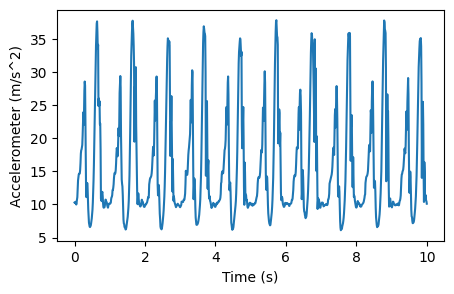

In [28]:
plt.figure(figsize=(5,3))
plt.plot(df['Time'], df['Accel'])
plt.xlabel('Time (s)')
plt.ylabel('Accelerometer (m/s^2)')
plt.show()

There may be situations where your times do not start at 0, but rather another value (e.g., the current [Unix time](https://www.epochconverter.com/)). If this is the case, you can easily adjust the start of your timestamps by subtracting the lowest timestamp value from all of the entries:

In [29]:
df['Time'] = df['Time'] - df['Time'].min() #takin all the values in time, then subtraticng the minimu value of that collum and subtracting it by smallet value (now eauwal to 10) and save it as the dr time so that it will stay
df.head(10)

,Time,Accel
0,0.00,10.300098
1,0.01,10.340338
2,0.02,10.302858
3,0.03,10.185373
4,0.04,10.418875
5,0.05,9.997921
6,0.06,10.396738
7,0.07,10.681087
8,0.08,11.111100
9,0.09,12.580975


# Option 2: `datetime`

For situations when it is important to keep track of the exact real-world date when a measurement was taken, one option is to use Python's built-in `datetime` object.

In [19]:
# Get the current time
from datetime import datetime #library with the data time we can use
datetime.now() #if i want to call the dattime for right now

datetime.datetime(2025, 11, 19, 18, 12, 6, 609124)

In [20]:
# Create a timestamp for a specific date and time
datetime(2022, 9, 1, 12, 0, 0)  # September 1, 2022, 12:00 PM

datetime.datetime(2022, 9, 1, 12, 0)

This data structure allows you to easily extract the specific characteristics of a given date, such as the year, minute, or even microsecond:



In [21]:
current_time = datetime.now()
print(f"Current year: {current_time.year}")
print(f"Current minute: {current_time.minute}")
print(f"Current microsecond: {current_time.microsecond}") #nice because it makes it easy to pul out informaton tied to. aparticular timestam


Current year: 2025
Current minute: 12
Current microsecond: 629561


If the horizontal axis involves `datetime` objects, the `plot()` function in `matplotlib` is good at automatically recognizing them as dates and displaying them as such.

In [22]:
# Manipulate the timestamps so they start at the current time
# No need to worry about the syntax
from datetime import timedelta
df = pd.read_csv('walking.csv')
current_time = datetime.now()
df['Date'] = df['Time'].apply(lambda t: current_time + timedelta(seconds=t))
df.head(10)

,Time,Accel,Date
0,0.00,10.300098,2025-11-19 18:12:06.645742
1,0.01,10.340338,2025-11-19 18:12:06.655742
2,0.02,10.302858,2025-11-19 18:12:06.665742
3,0.03,10.185373,2025-11-19 18:12:06.675742
4,0.04,10.418875,2025-11-19 18:12:06.685742
5,0.05,9.997921,2025-11-19 18:12:06.695742
6,0.06,10.396738,2025-11-19 18:12:06.705742
7,0.07,10.681087,2025-11-19 18:12:06.715742
8,0.08,11.111100,2025-11-19 18:12:06.725742
9,0.09,12.580975,2025-11-19 18:12:06.735742


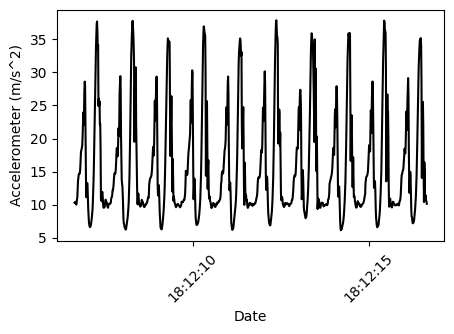

In [23]:
plt.figure(figsize=(5,3))
plt.plot(df['Date'], df['Accel'], 'k-')
plt.xlabel('Date')
plt.ylabel('Accelerometer (m/s^2)')
plt.xticks(rotation=45)
plt.show()

# Option 3: `Timestamp` in `pandas`

`pandas` provides powerful functionality to automatically infer dates from strings. Dates are technically converted into a bespoke data type in `pandas` called `Timestamp`, but is functionally similar to the `datetime` object in Python.

In the example below, we create a `DataFrame` using our own formatted string. By using the `to_datetime()` function, `pandas` automatically infers which parts of the string correspond to the year, month, etc.

In [30]:
# Check the current data type of each column
frame_dict = {'Date': ['Jan-01-2023 12:00', 'Jan-02-2023 1:00', 'Jan-03-2023 2:00', 'Jan-04-2023 3:00'],
              'Value': [45, 34, 23, 12]}
df = pd.DataFrame(frame_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4 non-null      object
 1   Value   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [31]:
# Convert the data type of the Date column to a datetime ##was just syaign int64
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4 non-null      datetime64[ns]
 1   Value   4 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 196.0 bytes


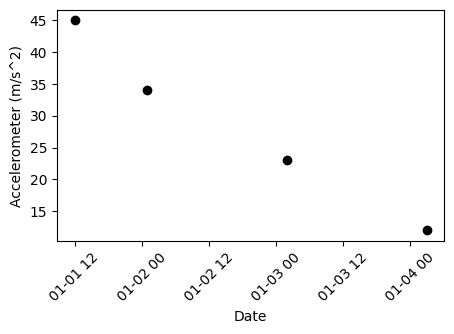

In [32]:
plt.figure(figsize=(5,3))
plt.plot(df['Date'], df['Value'], 'ko')
plt.xlabel('Date')
plt.ylabel('Accelerometer (m/s^2)')
plt.xticks(rotation=45)
plt.show()

When you load data from a .csv file, you can automatically suggest that certain columns are parsed as dates by setting the `infer_datetime_format` argument to `True` and specifying the columns that should be parsed using the `parse_dates` argument

In [33]:
df = pd.read_csv('walking.csv', parse_dates=['Time'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    1001 non-null   object 
 1   Accel   1001 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


/tmp/ipython-input-3501846751.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('walking.csv', parse_dates=['Time'], infer_datetime_format=True)
/tmp/ipython-input-3501846751.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('walking.csv', parse_dates=['Time'], infer_datetime_format=True)


In this case, using this functionality isn't going to do anything because using a single `int` as a human-interpretable date is underspecified. However, this technique will work for most columns that contain readily identifiable dates.